<a href="https://colab.research.google.com/github/sebastianvillaf/Quantum-AI-Summit-2025-stats-analysis-for-qiskit-fall-fest-2026/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from sklearn.metrics import matthews_corrcoef
from itertools import groupby
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from math import pi
from pathlib import Path


In [5]:
data_path=Path("data/summit.csv")
predata=pd.read_csv(data_path)

z=predata.isna()
data=predata.fillna(value="")

In [7]:
day1=(data["Asistencia día 1"]==1).sum()
day2=(data["Asistencia día 2"]==1).sum()
day3=(data["Asistencia día 3"]==1).sum()

print(f"asistieron {day1} personas el Viernes 19")
print(f"asistieron {day2} personas el Sabado 20")
print(f"asistieron {day3} personas el Domingo 21")
data=data.replace({"VERDADERO":1,"FALSO":0}).infer_objects(copy=False)

asistieron 124 personas el Viernes 19
asistieron 55 personas el Sabado 20
asistieron 70 personas el Domingo 21


In [8]:
#Correlación de retención
cr12=matthews_corrcoef(data["Asistencia día 1"],data["Asistencia día 2"])
print(cr12)
#Hubo mucha rotacion entre el dia 1 y 2, posiblemente porque aseguraron 1 de los 2 dias minimos que
#eran necesarios para recibir certificado

cr23=matthews_corrcoef(data["Asistencia día 2"],data["Asistencia día 3"])
print(cr23)

cr13=matthews_corrcoef(data["Asistencia día 1"],data["Asistencia día 3"])
print(cr13)

#entonces esto significa que el nuevo grupo de personas que fue el dia 2 tambien fue al dia 3
#esto podria ser posible porque los del dia 2 necesitaban ir otro dia mas
#para asegurar su certificado (el requisito era ir minimo 2 dias de los 3)
#entonces eso sugiere que definitivamente debemos ofrecer certificado en el qiskit fall fest 2026
#y debemos tener una tecnica de engage para
#que el grupo de personas que asistió al primer dia no dejen de ir al segundo y tercer dia

#Nota: Hay muchas personas que asistieron al primer día y no volvieron a asistir, es posible
#que hayan perdido motivación o la hilación debido a la dificultad de los temas de quantum computing


-0.3488323752494592
0.17023546374960816
-0.259392186072743


In [9]:
data["carrera"] = data["¿Qué carrera estudió, estudia o planea estudiar?"].str.strip().str.lower()
data["carrera"] = data["carrera"].replace({"ciencias de la computacion": "ciencias de la computación","ingenieria de software": "ingeniería de software","ingenieria de sistemas": "ingeniería de sistemas","ingeniera de sistemas":"ingeniería de sistemas","ingeniería física":"física"}, regex=True)

In [10]:
#Engagement según la carrera
data["Total Asistencia"]=data["Asistencia día 1"] + data["Asistencia día 2"] + data["Asistencia día 3"]

ranking_carreras=data.groupby("carrera")["Total Asistencia"].sum().sort_values(ascending=False)

print(ranking_carreras.head(7))

#Esta es la lista de carreras cuyos estudiantes asistieron más días al evento

carrera
ciencias de la computación    35
ingeniería de sistemas        32
física                        25
ingeniería de software        24
ingeniería electrónica        10
economía                      10
ingeniería mecatrónica         8
Name: Total Asistencia, dtype: int64


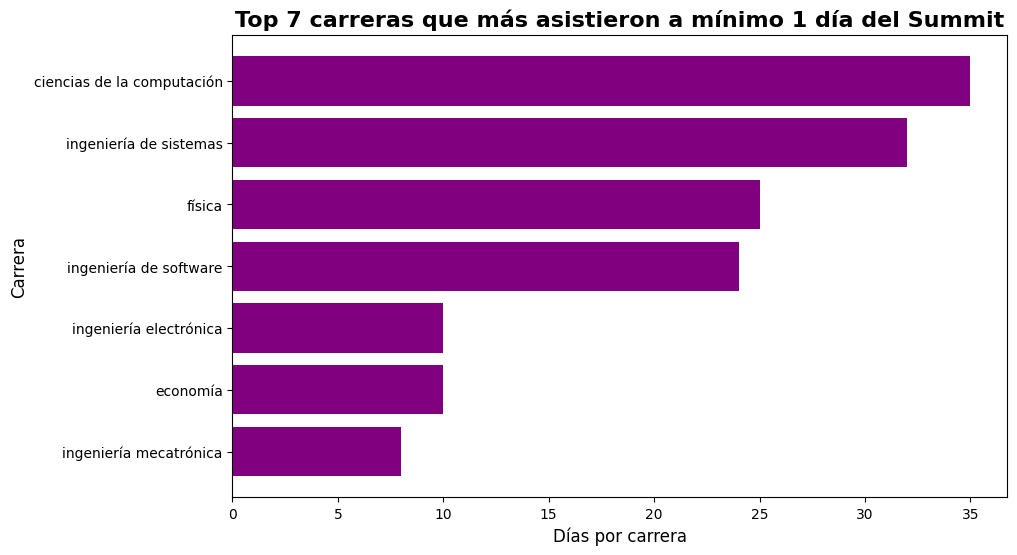

In [11]:
top_carreras = ranking_carreras.head(7)
plt.figure(figsize=(10,6))
plt.barh(top_carreras.index, top_carreras.values, color="purple")
plt.title("Top 7 carreras que más asistieron a mínimo 1 día del Summit", fontsize=16, fontweight="bold")
plt.xlabel('Días por carrera', fontsize=12)
plt.ylabel('Carrera', fontsize=12)
plt.gca().invert_yaxis()
plt.show()


In [12]:
#Volumen de asistencia diaria en base a la carrera
rd1=data.groupby("carrera")["Asistencia día 1"].sum().sort_values(ascending=False)
print(rd1.head(5))

rd2=data.groupby("carrera")["Asistencia día 2"].sum().sort_values(ascending=False)
print(rd2.head(5))

rd3=data.groupby("carrera")["Asistencia día 3"].sum().sort_values(ascending=False)
print(rd3.head(5))

#Esto comprueba el codigo anterior, el grupo que fue al dia 1 no es similar al que fue al dia 2 y 3
#Sin embargo los que fueron al dia 2 si fueron al día 3

carrera
ciencias de la computación    17
ingeniería de sistemas        14
física                        10
ingeniería de software        10
economía                       8
Name: Asistencia día 1, dtype: int64
carrera
ciencias de la computación          8
ingeniería de software              8
física                              8
ingeniería de sistemas              7
ingeniería de telecomunicaciones    2
Name: Asistencia día 2, dtype: int64
carrera
ingeniería de sistemas        11
ciencias de la computación    10
física                         7
ingeniería de software         6
ingeniería electrónica         3
Name: Asistencia día 3, dtype: int64


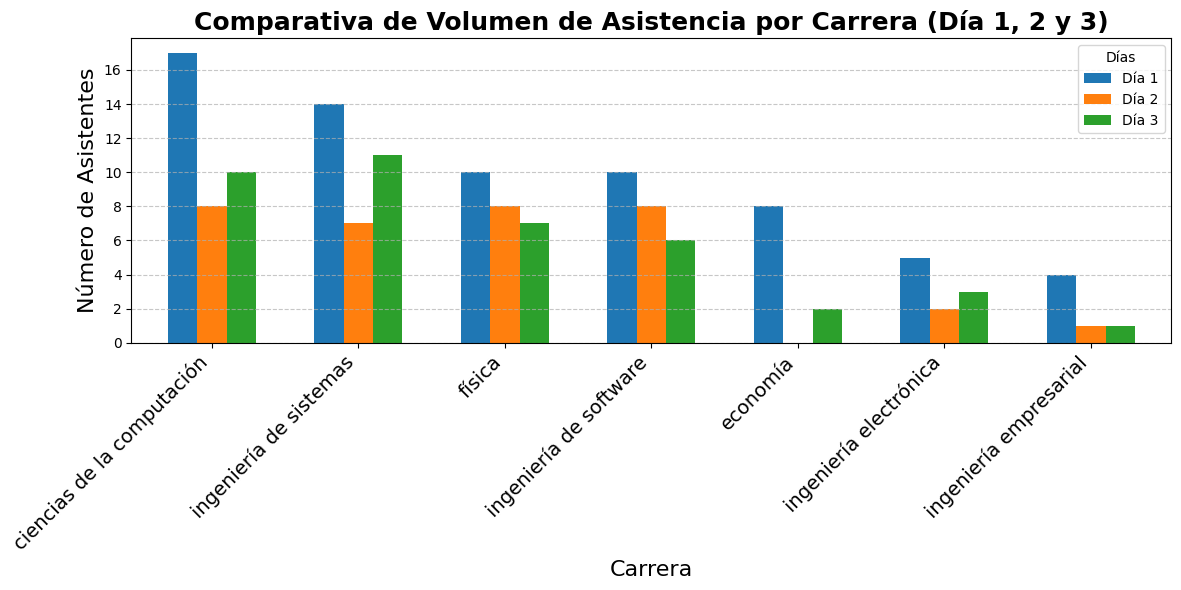

In [13]:
df_asistencia = pd.concat([rd1, rd2, rd3], axis=1)
df_asistencia.columns = ['Día 1', 'Día 2', 'Día 3']

df_asistencia = df_asistencia.fillna(0)


ax = df_asistencia.head(7).plot(kind='bar', figsize=(12, 6), width=0.6)

plt.title("Comparativa de Volumen de Asistencia por Carrera (Día 1, 2 y 3)", fontsize=18, fontweight="bold")
plt.xlabel("Carrera", fontsize=16)
plt.ylabel("Número de Asistentes", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=14)
plt.legend(title="Días")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [14]:
ranking_ocupacion=data.groupby("Ocupación actual")["Total Asistencia"].sum().sort_values(ascending=False)
ranking_edad=data.groupby("Edad")["Total Asistencia"].sum().sort_values(ascending=False)

print(ranking_ocupacion)
print(ranking_edad)

Ocupación actual
Universitario(a)    145
Profesional          38
Escolar              34
Egresado(a)          14
Otro                 10
Investigador(a)       5
                      3
Name: Total Asistencia, dtype: int64
Edad
18-24         112
25-34          47
17 o menos     46
35-44          23
45+            18
                3
Name: Total Asistencia, dtype: int64


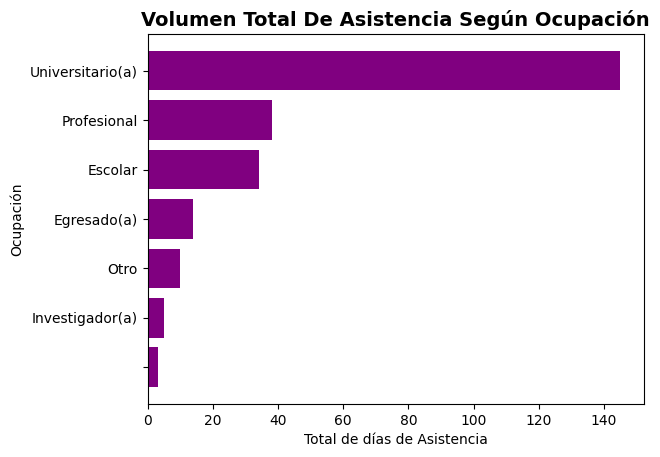

In [15]:
plt.barh(ranking_ocupacion.index, ranking_ocupacion.values, color="purple")
plt.xlabel("Total de días de Asistencia")
plt.ylabel("Ocupación")
plt.title("Volumen Total De Asistencia Según Ocupación",fontsize=14,fontweight='bold')
plt.gca().invert_yaxis()
plt.show()


In [16]:
#Filtrar las carreras stem y no stem para comprobar la hipotesis planteada en el codigo de retencion

stem=["ingeniería","computación","física","ciberseguridad","artificial"]

def ordenarcarreras(word):
  for k in stem:
    if k in(word):
      return "STEM"
  return "No STEM"

data["tipocarrera"]=data["carrera"].apply(ordenarcarreras)


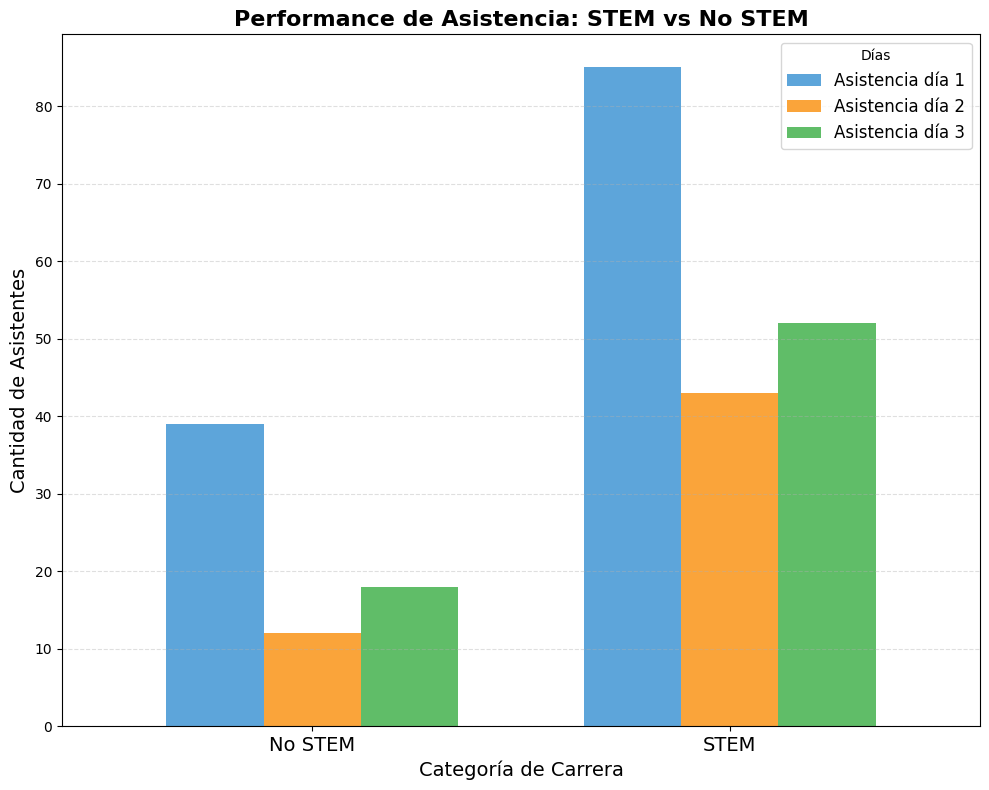

In [17]:
# 1. Agrupamos por 'tipocarrera' sumando los 3 días de asistencia a la vez
df_asistencia_stem = data.groupby("tipocarrera")[["Asistencia día 1", "Asistencia día 2", "Asistencia día 3"]].sum()

# 2. Graficamos (esto crea las 3 barritas automáticamente por categoría)
ax = df_asistencia_stem.plot(kind='bar', figsize=(10,8), width=0.7, color=['#5da5da', '#faa43a', '#60bd68'])

# 3. Personalizamos el tamaño de las letras y etiquetas
plt.title('Performance de Asistencia: STEM vs No STEM', fontsize=16, fontweight='bold')
plt.xlabel('Categoría de Carrera', fontsize=14)
plt.ylabel('Cantidad de Asistentes', fontsize=14)

# Ponemos los nombres (STEM / No STEM) en horizontal y más grandes
plt.xticks(rotation=0, fontsize=14)
plt.legend(title="Días", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

In [18]:
#Filtrar a los que fueron al dia 1 pero dejaron de ir al dia 2 y 3 para la prueba de hipotesis
data["hipotesis"]=((data["Asistencia día 1"]==1)&(data["Asistencia día 2"]==0)&(data["Asistencia día 3"]==0)).astype(int)


In [19]:
#Tabla de contingencia para prueba chi cuadrado
tabla=pd.crosstab(data["tipocarrera"],data["hipotesis"])

In [20]:
#Prueba de hipotesis chi cuadrado
#H0=No existe dependencia. El abandono es por igual en carrera STEM y no STEM del grupo de personas que asisiteron el dia 1 y no fueron el dia 2 y 3.
#H1=Existe una relación (dependencia) entre la carrera y el abandono.

chi2_stat, p, dof, expected = chi2_contingency(tabla)

print(f"Estadístico chi cuadrado: {chi2_stat}")
print(f"p-value: {p}")

#el p-value resulto 0.3064 > 0.05, estadisticamente no se puede afirmar que el grupo
#que asistio al dia 1 y dejaron de venir dias posteriores tenga como causa la clasificacion STEM

#Es probable que el abandono se deba a otros factores como el dia (sabado 20, dia de ocio), marketing
#ubicacion del auditorio, etc. Se realizará una encuesta para tener datos fieles y mejorar el engagement

print("---------------------------------------------------------------------------------------")
print("porcetanjes de abandonos por stem y no stem")

tablaporcentajes=pd.crosstab(data["tipocarrera"],data["hipotesis"],normalize="index")*100
tablaporcentajes=tablaporcentajes.drop(columns=[0])
print(tablaporcentajes)

Estadístico chi cuadrado: 1.0458978380958879
p-value: 0.3064537468437098
---------------------------------------------------------------------------------------
porcetanjes de abandonos por stem y no stem
hipotesis            1
tipocarrera           
No STEM      41.860465
STEM         31.313131


In [21]:
#Dado que la prueba de hipotesis de chi cuadrado representa que no se puede
#probar estadisticamente que la carrera influya en la desercion (al menos del grupo que fue al dia 1 y no volvió)

#Usaremos una regresión logistica para apoyarnos de otros datos como la ocupación, edad y clasificacion stem conjuntamente

#convertimos a booleanos 1:STEM, 0=No STEM
data["es_STEM"]=data["tipocarrera"].apply(lambda x:1 if str(x)=="STEM" else 0)
#convertimos a booleanos 1:edad 18-24, 0=otras edades
data["edad_18-24"]=data["Edad"].apply(lambda x:1 if str(x)=="18-24" else 0)
#convertimos a bolleanos 1:universitarios, 0=escolares, profesionales, egresados, etc.
data["es_universitario"] = data["Ocupación actual"].apply(lambda x:1 if x=="Universitario(a)" else 0)

columna_compromiso = ["¿A qué días se compromete asistir?", "Unnamed: 9", "Unnamed: 10"]
data["dias_compromiso"] = data[columna_compromiso].apply(lambda x:(x != "").sum(), axis=1)


In [22]:
#Variables de la Regresión Logistica
X_logit=data[["es_STEM", "edad_18-24", "es_universitario", "dias_compromiso"]]
X_logit=sm.add_constant(X_logit)
y_logit=data["hipotesis"]

#Regresión Logística
modelo = sm.Logit(y_logit, X_logit.astype(float))
resultado = modelo.fit()
print(resultado.summary())


#Dado que los p-values > 0.05 para todas las variables (STEM, Edad, Compromiso), estadisticamente no se puede afirmar que estas variables influyan en el abandono.
#El comportamiento es aleatorio respecto al perfil del asistente

#Ejecutaré un modelo de k-means clustering para detectar patrones (arquetipos) en los asistentes.
#Este k means servira de base para un repositorio v2.0 donde aplicare un modelo de machine learning
#para predecir la probabilidad de asistencia al evento (se tendrá en cuenta tambien los registrados que no asistieron, es decir que no estan en este csv)
#incorporaré nuevas variables como "Tiempo de viaje al auditorio" que se recolectarán en el próximo formulario en el grupo de difusion del evento.

Optimization terminated successfully.
         Current function value: 0.636919
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              hipotesis   No. Observations:                  142
Model:                          Logit   Df Residuals:                      137
Method:                           MLE   Df Model:                            4
Date:                Thu, 15 Jan 2026   Pseudo R-squ.:                 0.01152
Time:                        05:00:24   Log-Likelihood:                -90.443
converged:                       True   LL-Null:                       -91.496
Covariance Type:            nonrobust   LLR p-value:                    0.7159
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6094      0.606     -1.006      0.314      -1.796       0.577
es_STEM    

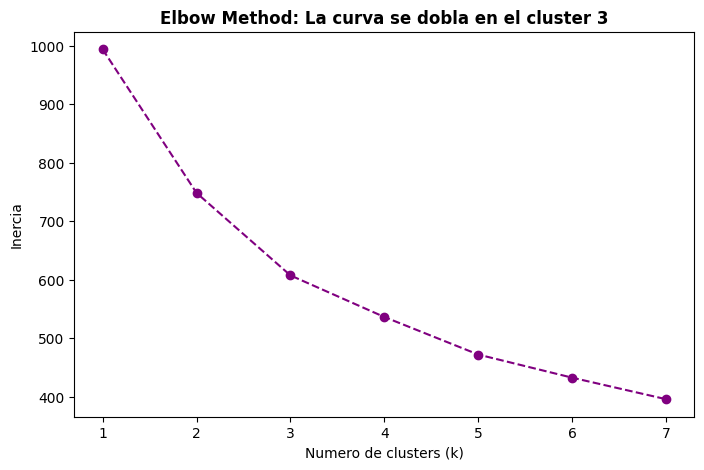

In [23]:
features = ["es_STEM", "edad_18-24", "dias_compromiso", "Asistencia día 1", "Asistencia día 2", "Asistencia día 3", "es_universitario"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])

#Elbow method
inertia = []
k_range = range(1, 8)
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled)
    inertia.append(kmeans_temp.inertia_)

# Graficamos la curva
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker="o", linestyle="--", color="purple")
plt.xlabel("Numero de clusters (k)")
plt.ylabel("Inercia")
plt.title("Elbow Method: La curva se dobla en el cluster 3", fontweight="bold")
plt.show()

In [24]:
kmeans_final=KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_final.fit(X_scaled)

data["cluster"]=kmeans_final.labels_


print("PERFILES DE LOS CLUSTERS")
print(data.groupby('cluster')[features].mean())


#Cluster 0: Los adultos ocupados (mas o menos STEM)
#-10% universitarios (son trabajadores, egresados e investigadores)
#-44% STEM
#-0% jovenes de 18-24 años
#-se comprometieron a asistir a 2.4 días
#Asistencia día 1: 100%
#Asistencia día 2: 27%
#Asistencia día 3: 44%

#Cluster 1: Los universitarios STEM entusiastas
#-100% universitarios
#-90% STEM
#-81% jovenes de 18-24 años
#-se comprometieron a asistir 2.5 días
#Asistencia día 1: 100%
#Asistencia día 2: 36%
#Asistencia día 3: 43%

#Cluster 2: Los que querian certificado (jovenes y adultos STEM)
#-55% universitarios (mita/mita)
#-77% STEM
#-50% jovenes de 18-24 años
#-se comprometieron a asistir 2.2 días
#Asistencia día 1: 0%
#Asistencia día 2: 83%
#Asistencia día 3: 83%

#Conclusiones:
#Hubo un publico nuevo casi completamente diferente entre el dia 1 y 2
#Los estudiantes de ingeniería abandonaron con la misma probabilidad que los de marketing y los universitarios igual que los profesionales.
#El problema de retención no fue de convocatoria con total libertad a perfiles, sino estructural del evento (probablemente por la sede, hipotesis por confirmar con las respuestas formulario).



PERFILES DE LOS CLUSTERS
          es_STEM  edad_18-24  dias_compromiso  Asistencia día 1  \
cluster                                                            
0        0.448276    0.000000         2.413793               1.0   
1        0.893939    0.818182         2.454545               1.0   
2        0.777778    0.500000         2.222222               0.0   

         Asistencia día 2  Asistencia día 3  es_universitario  
cluster                                                        
0                0.275862          0.448276          0.103448  
1                0.363636          0.439394          1.000000  
2                0.833333          0.833333          0.555556  


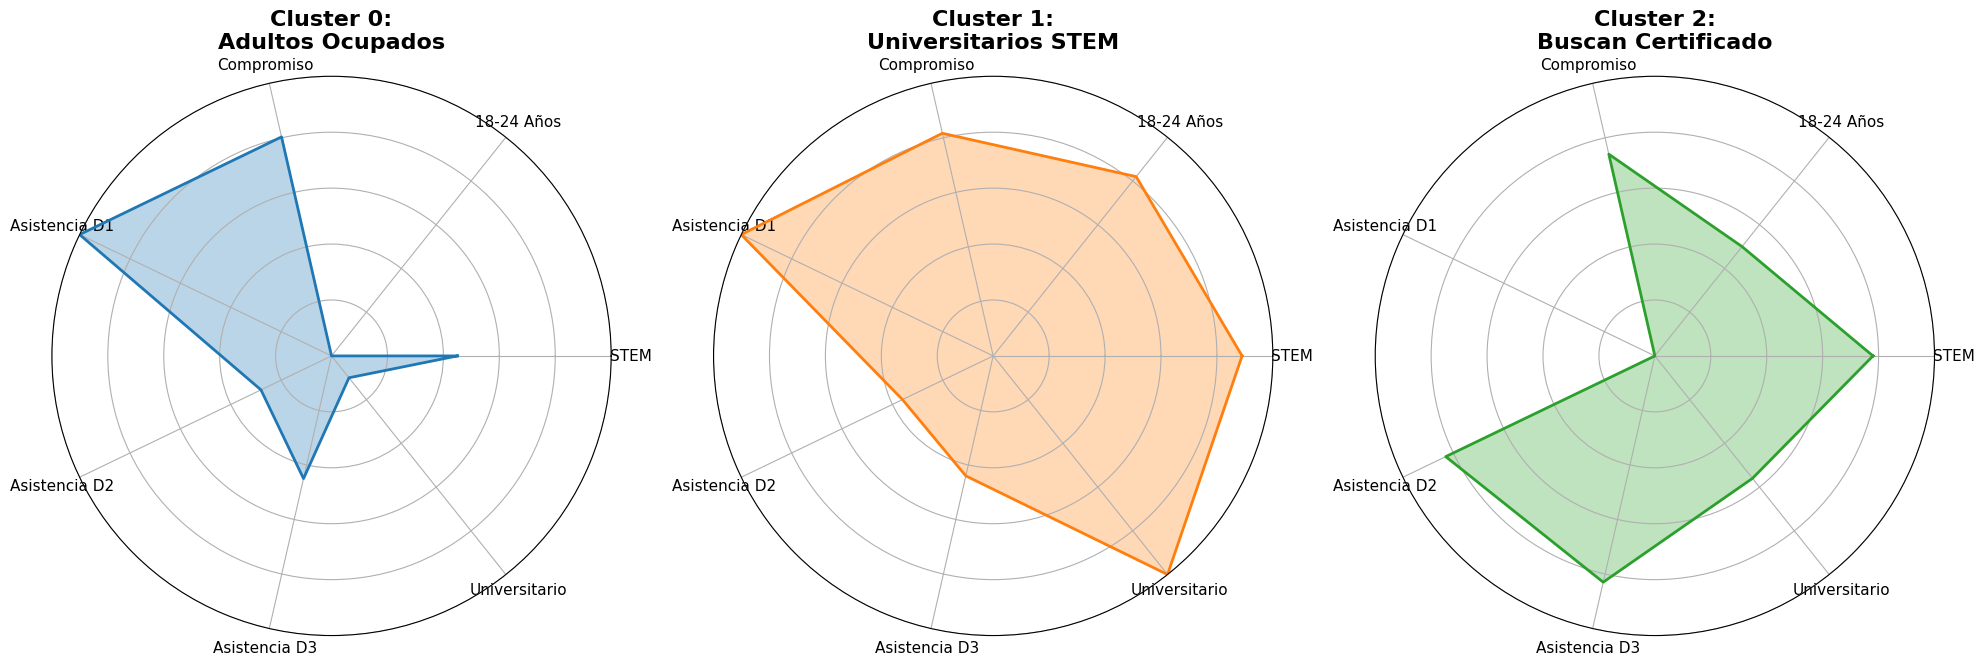

In [37]:
#variables para el gráfico de radar
labels = ["STEM", "18-24 Años", "Compromiso", "Asistencia D1", "Asistencia D2", "Asistencia D3", "Universitario"]

#valores promedio por cluster (normalizados de 0 a 1)
c0_valores = [0.45, 0.00, 2.41/3, 1.0, 0.28, 0.45, 0.10]
c1_valores = [0.89, 0.82, 2.45/3, 1.0, 0.36, 0.44, 1.00]
c2_valores = [0.78, 0.50, 2.22/3, 0.0, 0.83, 0.83, 0.56]

datos_clusters = [c0_valores, c1_valores, c2_valores]
nombres = ["Cluster 0:\nAdultos Ocupados", "Cluster 1:\nUniversitarios STEM", "Cluster 2:\nBuscan Certificado"]

#configuración matemática de los ángulos
num_vars=len(labels)
angulos=[n/float(num_vars)*2*pi for n in range(num_vars)]
angulos+=angulos[:1]


fig, axes = plt.subplots(1, 3, figsize=(20, 7), subplot_kw={"projection": "polar"})
for i, ax in enumerate(axes):
    data = datos_clusters[i]
    data += data[:1]

    #gráfico
    ax.plot(angulos, data, color=colores[i], linewidth=2, linestyle="solid")
    ax.fill(angulos, data, color=colores[i], alpha=0.3)
    ax.set_xticks(angulos[:-1])
    ax.set_xticklabels(labels, size=11)
    ax.set_ylim(0, 1)
    ax.set_yticklabels([])
    ax.set_title(nombres[i], size=16, weight="bold", pad=20)

plt.tight_layout()
plt.show()